In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime

### 1. Data Reading 

In [90]:
df = pd.read_csv('../data/NIFTY_data/NIFTY_2008_2020.csv')

In [91]:
df.head()

,Instrument,Date,Time,Open,High,Low,Close
0,NIFTY,20080101,09:55,6138.60,6154.60,6138.60,6148.90
1,NIFTY,20080101,09:56,6149.75,6149.75,6132.80,6132.80
2,NIFTY,20080101,09:57,6138.25,6138.25,6127.95,6127.95
3,NIFTY,20080101,09:58,6127.15,6127.15,6120.90,6120.90
4,NIFTY,20080101,09:59,6118.05,6118.05,6113.55,6113.90


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178891 entries, 0 to 1178890
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Instrument  1178891 non-null  object 
 1   Date        1178891 non-null  int64  
 2   Time        1178891 non-null  object 
 3   Open        1178891 non-null  float64
 4   High        1178891 non-null  float64
 5   Low         1178891 non-null  float64
 6   Close       1178891 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 63.0+ MB


In [93]:
df.columns

Index(['Instrument', 'Date', 'Time', 'Open', 'High', 'Low', 'Close'], dtype='object')

### 2. Data Pre-processing

In [94]:
# converting the date column to right format

date_format = '%Y%m%d'
df['Date'] = pd.to_datetime(df['Date'], format=date_format)

In [95]:
df['Timestamp'] = df.apply(lambda r : pd.datetime.combine(r['Date'],datetime.strptime(r['Time'],'%H:%M').time()),1)

/tmp/ipykernel_11873/3581200122.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df['Timestamp'] = df.apply(lambda r : pd.datetime.combine(r['Date'],datetime.strptime(r['Time'],'%H:%M').time()),1)


In [96]:
df.head()

,Instrument,Date,Time,Open,High,Low,Close,Timestamp
0,NIFTY,2008-01-01,09:55,6138.60,6154.60,6138.60,6148.90,2008-01-01 09:55:00
1,NIFTY,2008-01-01,09:56,6149.75,6149.75,6132.80,6132.80,2008-01-01 09:56:00
2,NIFTY,2008-01-01,09:57,6138.25,6138.25,6127.95,6127.95,2008-01-01 09:57:00
3,NIFTY,2008-01-01,09:58,6127.15,6127.15,6120.90,6120.90,2008-01-01 09:58:00
4,NIFTY,2008-01-01,09:59,6118.05,6118.05,6113.55,6113.90,2008-01-01 09:59:00


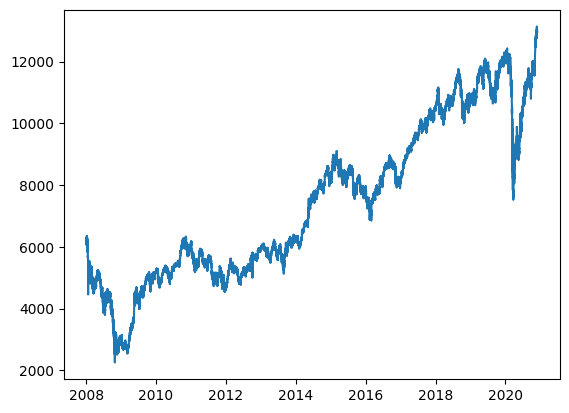

In [97]:
plt.plot(df['Timestamp'],df['Close'])
plt.show()

#### Clean the df by removing unwanted columns
##### Instrument, Date, Time columns to be removed

In [98]:
df = df.drop(['Instrument', 'Time'], axis=1)

In [99]:
df.head()

,Date,Open,High,Low,Close,Timestamp
0,2008-01-01,6138.60,6154.60,6138.60,6148.90,2008-01-01 09:55:00
1,2008-01-01,6149.75,6149.75,6132.80,6132.80,2008-01-01 09:56:00
2,2008-01-01,6138.25,6138.25,6127.95,6127.95,2008-01-01 09:57:00
3,2008-01-01,6127.15,6127.15,6120.90,6120.90,2008-01-01 09:58:00
4,2008-01-01,6118.05,6118.05,6113.55,6113.90,2008-01-01 09:59:00


### 3. Feature Engineering

#### Calculating simple moving average for 30 and 90 days for Close column

In [100]:
SMA1Month = 1
SMA3Month = 3

df['CloseSMA30'] = df['Close'].rolling(min_periods=1, center=True, window=SMA1Month).mean()
df['CloseSMA90'] = df['Close'].rolling(min_periods=1, center=True, window=SMA3Month).mean()

df.head()

,Date,Open,High,Low,Close,Timestamp,CloseSMA30,CloseSMA90
0,2008-01-01,6138.60,6154.60,6138.60,6148.90,2008-01-01 09:55:00,6148.90,6140.850000
1,2008-01-01,6149.75,6149.75,6132.80,6132.80,2008-01-01 09:56:00,6132.80,6136.550000
2,2008-01-01,6138.25,6138.25,6127.95,6127.95,2008-01-01 09:57:00,6127.95,6127.216667
3,2008-01-01,6127.15,6127.15,6120.90,6120.90,2008-01-01 09:58:00,6120.90,6120.916667
4,2008-01-01,6118.05,6118.05,6113.55,6113.90,2008-01-01 09:59:00,6113.90,6119.383333


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178891 entries, 0 to 1178890
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   Date        1178891 non-null  datetime64[ns]
 1   Open        1178891 non-null  float64       
 2   High        1178891 non-null  float64       
 3   Low         1178891 non-null  float64       
 4   Close       1178891 non-null  float64       
 5   Timestamp   1178891 non-null  datetime64[ns]
 6   CloseSMA30  1178891 non-null  float64       
 7   CloseSMA90  1178891 non-null  float64       
dtypes: datetime64[ns](2), float64(6)
memory usage: 72.0 MB


#### Calculating HL_diff,

In [102]:
# HL_diff = H_Max - H_Min
# where, H_Max = maximum high prce of month
# H_Min = minimum low price of month

df2 = df[['Timestamp','Date','High','Low']]
df2.head()

,Timestamp,Date,High,Low
0,2008-01-01 09:55:00,2008-01-01,6154.60,6138.60
1,2008-01-01 09:56:00,2008-01-01,6149.75,6132.80
2,2008-01-01 09:57:00,2008-01-01,6138.25,6127.95
3,2008-01-01 09:58:00,2008-01-01,6127.15,6120.90
4,2008-01-01 09:59:00,2008-01-01,6118.05,6113.55


In [103]:
df2['Month'] = pd.DatetimeIndex(df2['Date']).month
df2['Year'] = pd.DatetimeIndex(df2['Date']).year
df2['Day'] = pd.DatetimeIndex(df2['Date']).dayofweek

/tmp/ipykernel_11873/2196087070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month'] = pd.DatetimeIndex(df2['Date']).month
/tmp/ipykernel_11873/2196087070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Year'] = pd.DatetimeIndex(df2['Date']).year
/tmp/ipykernel_11873/2196087070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [104]:
df2

,Timestamp,Date,High,Low,Month,Year,Day
0,2008-01-01 09:55:00,2008-01-01,6154.60,6138.60,1,2008,1
1,2008-01-01 09:56:00,2008-01-01,6149.75,6132.80,1,2008,1
2,2008-01-01 09:57:00,2008-01-01,6138.25,6127.95,1,2008,1
3,2008-01-01 09:58:00,2008-01-01,6127.15,6120.90,1,2008,1
4,2008-01-01 09:59:00,2008-01-01,6118.05,6113.55,1,2008,1
...,...,...,...,...,...,...,...
1178886,2020-11-27 15:28:00,2020-11-27,12947.00,12927.95,11,2020,4
1178887,2020-11-27 15:29:00,2020-11-27,12947.90,12928.35,11,2020,4
1178888,2020-11-27 15:30:00,2020-11-27,12948.60,12933.85,11,2020,4
1178889,2020-11-27 15:31:00,2020-11-27,12941.95,12941.95,11,2020,4


In [105]:
df2_group = df2.groupby(['Month','Year']).agg({'High':'max','Low':'min'})
df2_group.reset_index()
df2_group = df2_group.rename(columns={'High':'H_Max','Low':'L_Min'})

In [106]:
df3 = pd.merge(df2, df2_group, how='left', on=['Month', 'Year'])

In [107]:
df3

,Timestamp,Date,High,Low,Month,Year,Day,H_Max,L_Min
0,2008-01-01 09:55:00,2008-01-01,6154.60,6138.60,1,2008,1,6356.20,4450.15
1,2008-01-01 09:56:00,2008-01-01,6149.75,6132.80,1,2008,1,6356.20,4450.15
2,2008-01-01 09:57:00,2008-01-01,6138.25,6127.95,1,2008,1,6356.20,4450.15
3,2008-01-01 09:58:00,2008-01-01,6127.15,6120.90,1,2008,1,6356.20,4450.15
4,2008-01-01 09:59:00,2008-01-01,6118.05,6113.55,1,2008,1,6356.20,4450.15
...,...,...,...,...,...,...,...,...,...
1178886,2020-11-27 15:28:00,2020-11-27,12947.00,12927.95,11,2020,4,13145.85,11557.40
1178887,2020-11-27 15:29:00,2020-11-27,12947.90,12928.35,11,2020,4,13145.85,11557.40
1178888,2020-11-27 15:30:00,2020-11-27,12948.60,12933.85,11,2020,4,13145.85,11557.40
1178889,2020-11-27 15:31:00,2020-11-27,12941.95,12941.95,11,2020,4,13145.85,11557.40


In [108]:
df3 = df3.drop(['Date','High','Low',], axis=1)
df = pd.merge(df, df3, how='left', on=['Timestamp'])

In [109]:
df

,Date,Open,High,Low,Close,Timestamp,CloseSMA30,CloseSMA90,Month,Year,Day,H_Max,L_Min
0,2008-01-01,6138.60,6154.60,6138.60,6148.90,2008-01-01 09:55:00,6148.90,6140.850000,1,2008,1,6356.20,4450.15
1,2008-01-01,6149.75,6149.75,6132.80,6132.80,2008-01-01 09:56:00,6132.80,6136.550000,1,2008,1,6356.20,4450.15
2,2008-01-01,6138.25,6138.25,6127.95,6127.95,2008-01-01 09:57:00,6127.95,6127.216667,1,2008,1,6356.20,4450.15
3,2008-01-01,6127.15,6127.15,6120.90,6120.90,2008-01-01 09:58:00,6120.90,6120.916667,1,2008,1,6356.20,4450.15
4,2008-01-01,6118.05,6118.05,6113.55,6113.90,2008-01-01 09:59:00,6113.90,6119.383333,1,2008,1,6356.20,4450.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193136,2020-11-27,12947.00,12947.00,12927.95,12927.95,2020-11-27 15:28:00,12927.95,12937.500000,11,2020,4,13145.85,11557.40
1193137,2020-11-27,12928.35,12947.90,12928.35,12937.70,2020-11-27 15:29:00,12937.70,12936.166667,11,2020,4,13145.85,11557.40
1193138,2020-11-27,12936.40,12948.60,12933.85,12942.85,2020-11-27 15:30:00,12942.85,12940.833333,11,2020,4,13145.85,11557.40
1193139,2020-11-27,12941.95,12941.95,12941.95,12941.95,2020-11-27 15:31:00,12941.95,12951.250000,11,2020,4,13145.85,11557.40


In [110]:
df['HL_Diff'] = df.apply(lambda x: x['H_Max'] - x['L_Min'], axis=1)

In [111]:
df

,Date,Open,High,Low,Close,Timestamp,CloseSMA30,CloseSMA90,Month,Year,Day,H_Max,L_Min,HL_Diff
0,2008-01-01,6138.60,6154.60,6138.60,6148.90,2008-01-01 09:55:00,6148.90,6140.850000,1,2008,1,6356.20,4450.15,1906.05
1,2008-01-01,6149.75,6149.75,6132.80,6132.80,2008-01-01 09:56:00,6132.80,6136.550000,1,2008,1,6356.20,4450.15,1906.05
2,2008-01-01,6138.25,6138.25,6127.95,6127.95,2008-01-01 09:57:00,6127.95,6127.216667,1,2008,1,6356.20,4450.15,1906.05
3,2008-01-01,6127.15,6127.15,6120.90,6120.90,2008-01-01 09:58:00,6120.90,6120.916667,1,2008,1,6356.20,4450.15,1906.05
4,2008-01-01,6118.05,6118.05,6113.55,6113.90,2008-01-01 09:59:00,6113.90,6119.383333,1,2008,1,6356.20,4450.15,1906.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193136,2020-11-27,12947.00,12947.00,12927.95,12927.95,2020-11-27 15:28:00,12927.95,12937.500000,11,2020,4,13145.85,11557.40,1588.45
1193137,2020-11-27,12928.35,12947.90,12928.35,12937.70,2020-11-27 15:29:00,12937.70,12936.166667,11,2020,4,13145.85,11557.40,1588.45
1193138,2020-11-27,12936.40,12948.60,12933.85,12942.85,2020-11-27 15:30:00,12942.85,12940.833333,11,2020,4,13145.85,11557.40,1588.45
1193139,2020-11-27,12941.95,12941.95,12941.95,12941.95,2020-11-27 15:31:00,12941.95,12951.250000,11,2020,4,13145.85,11557.40,1588.45


#### Calculating CO_Mean

In [112]:
# CO_Mean is defined by monthwise mean of difference of Close and Open values

# calculating the difference for close and open for each row in the df
df['CO_Diff'] = df.apply(lambda x: x['Close'] - x['Open'], axis=1)
df.head()

,Date,Open,High,Low,Close,Timestamp,CloseSMA30,CloseSMA90,Month,Year,Day,H_Max,L_Min,HL_Diff,CO_Diff
0,2008-01-01,6138.60,6154.60,6138.60,6148.90,2008-01-01 09:55:00,6148.90,6140.850000,1,2008,1,6356.2,4450.15,1906.05,10.30
1,2008-01-01,6149.75,6149.75,6132.80,6132.80,2008-01-01 09:56:00,6132.80,6136.550000,1,2008,1,6356.2,4450.15,1906.05,-16.95
2,2008-01-01,6138.25,6138.25,6127.95,6127.95,2008-01-01 09:57:00,6127.95,6127.216667,1,2008,1,6356.2,4450.15,1906.05,-10.30
3,2008-01-01,6127.15,6127.15,6120.90,6120.90,2008-01-01 09:58:00,6120.90,6120.916667,1,2008,1,6356.2,4450.15,1906.05,-6.25
4,2008-01-01,6118.05,6118.05,6113.55,6113.90,2008-01-01 09:59:00,6113.90,6119.383333,1,2008,1,6356.2,4450.15,1906.05,-4.15


In [113]:
# calculating monthwise mean of CO_diff as CO_Mean

df5 = df[['Month','Year','CO_Diff']]
df5 = df5.groupby(['Month','Year']).agg({'CO_Diff':'mean'})
df5 = df5.reset_index()

df = df.drop('CO_Diff', axis=1)


df = pd.merge(df,df5,how="left",on=['Month','Year'])
df = df.rename(columns={'CO_Diff':'CO_Mean'})
df

,Date,Open,High,Low,Close,Timestamp,CloseSMA30,CloseSMA90,Month,Year,Day,H_Max,L_Min,HL_Diff,CO_Mean
0,2008-01-01,6138.60,6154.60,6138.60,6148.90,2008-01-01 09:55:00,6148.90,6140.850000,1,2008,1,6356.20,4450.15,1906.05,-0.092969
1,2008-01-01,6149.75,6149.75,6132.80,6132.80,2008-01-01 09:56:00,6132.80,6136.550000,1,2008,1,6356.20,4450.15,1906.05,-0.092969
2,2008-01-01,6138.25,6138.25,6127.95,6127.95,2008-01-01 09:57:00,6127.95,6127.216667,1,2008,1,6356.20,4450.15,1906.05,-0.092969
3,2008-01-01,6127.15,6127.15,6120.90,6120.90,2008-01-01 09:58:00,6120.90,6120.916667,1,2008,1,6356.20,4450.15,1906.05,-0.092969
4,2008-01-01,6118.05,6118.05,6113.55,6113.90,2008-01-01 09:59:00,6113.90,6119.383333,1,2008,1,6356.20,4450.15,1906.05,-0.092969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193136,2020-11-27,12947.00,12947.00,12927.95,12927.95,2020-11-27 15:28:00,12927.95,12937.500000,11,2020,4,13145.85,11557.40,1588.45,0.026115
1193137,2020-11-27,12928.35,12947.90,12928.35,12937.70,2020-11-27 15:29:00,12937.70,12936.166667,11,2020,4,13145.85,11557.40,1588.45,0.026115
1193138,2020-11-27,12936.40,12948.60,12933.85,12942.85,2020-11-27 15:30:00,12942.85,12940.833333,11,2020,4,13145.85,11557.40,1588.45,0.026115
1193139,2020-11-27,12941.95,12941.95,12941.95,12941.95,2020-11-27 15:31:00,12941.95,12951.250000,11,2020,4,13145.85,11557.40,1588.45,0.026115


In [114]:
df['Day'].value_counts()

1    240649
2    239342
3    237615
0    237467
4    236478
5      1464
6       126
Name: Day, dtype: int64

In [115]:
# Values 5 and 6 correspond to saturday and sunday in the 'Day' columne,
# The stock exchange doesn't operate on weekends but on certain saturdays and sundays brokers test their systems,
# hence these values are captured in the dataset. It is safe to discard these values

df = df.loc[~((df['Day']==5) | (df['Day']==6)),:]
df

,Date,Open,High,Low,Close,Timestamp,CloseSMA30,CloseSMA90,Month,Year,Day,H_Max,L_Min,HL_Diff,CO_Mean
0,2008-01-01,6138.60,6154.60,6138.60,6148.90,2008-01-01 09:55:00,6148.90,6140.850000,1,2008,1,6356.20,4450.15,1906.05,-0.092969
1,2008-01-01,6149.75,6149.75,6132.80,6132.80,2008-01-01 09:56:00,6132.80,6136.550000,1,2008,1,6356.20,4450.15,1906.05,-0.092969
2,2008-01-01,6138.25,6138.25,6127.95,6127.95,2008-01-01 09:57:00,6127.95,6127.216667,1,2008,1,6356.20,4450.15,1906.05,-0.092969
3,2008-01-01,6127.15,6127.15,6120.90,6120.90,2008-01-01 09:58:00,6120.90,6120.916667,1,2008,1,6356.20,4450.15,1906.05,-0.092969
4,2008-01-01,6118.05,6118.05,6113.55,6113.90,2008-01-01 09:59:00,6113.90,6119.383333,1,2008,1,6356.20,4450.15,1906.05,-0.092969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193136,2020-11-27,12947.00,12947.00,12927.95,12927.95,2020-11-27 15:28:00,12927.95,12937.500000,11,2020,4,13145.85,11557.40,1588.45,0.026115
1193137,2020-11-27,12928.35,12947.90,12928.35,12937.70,2020-11-27 15:29:00,12937.70,12936.166667,11,2020,4,13145.85,11557.40,1588.45,0.026115
1193138,2020-11-27,12936.40,12948.60,12933.85,12942.85,2020-11-27 15:30:00,12942.85,12940.833333,11,2020,4,13145.85,11557.40,1588.45,0.026115
1193139,2020-11-27,12941.95,12941.95,12941.95,12941.95,2020-11-27 15:31:00,12941.95,12951.250000,11,2020,4,13145.85,11557.40,1588.45,0.026115


### 4. Scale and transform the data

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
scaler = StandardScaler()

In [126]:
df_to_scale = df.drop(['Date','Timestamp','Month','Year','H_Max','L_Min'],axis=1)

In [127]:
df_to_scale.head()

,Open,High,Low,Close,CloseSMA30,CloseSMA90,Day,HL_Diff,CO_Mean
0,6138.60,6154.60,6138.60,6148.90,6148.90,6140.850000,1,1906.05,-0.092969
1,6149.75,6149.75,6132.80,6132.80,6132.80,6136.550000,1,1906.05,-0.092969
2,6138.25,6138.25,6127.95,6127.95,6127.95,6127.216667,1,1906.05,-0.092969
3,6127.15,6127.15,6120.90,6120.90,6120.90,6120.916667,1,1906.05,-0.092969
4,6118.05,6118.05,6113.55,6113.90,6113.90,6119.383333,1,1906.05,-0.092969


In [129]:
scaled_df = scaler.fit(df_to_scale)
scaled_df = scaler.transform(df_to_scale)
print(scaled_df)

[[-0.5496714  -0.543934   -0.54906969 ... -0.70547763  3.36754241
  -1.62494305]
 [-0.54525463 -0.54585494 -0.55136753 ... -0.70547763  3.36754241
  -1.62494305]
 [-0.54981005 -0.55040975 -0.55328899 ... -0.70547763  3.36754241
  -1.62494305]
 ...
 [ 2.14309582  2.14696684  2.14305766 ...  1.41989517  2.55431764
   1.01526602]
 [ 2.1452943   2.14433298  2.1462667  ...  1.41989517  2.55431764
   1.01526602]
 [ 2.14573004  2.15502687  2.14670249 ...  1.41989517  2.55431764
   1.01526602]]


#### Creating the train and test datasets

In [ ]:
from sklearn.model_selection import train_test_split

X = []
Y = []

window_size=100

for i in range(1 , len(scaled_df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))